<a href="https://colab.research.google.com/github/ZKisielewska/learning-git-task/blob/master/M_14_5_Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use the collection **penguins.csv** [download](https://uploads.kodilla.com/bootcamp/ds/14/penguins.csv), which contains features for different species of penguins, do some exploration, and then teach the models learned in this module.

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [124]:
# download 'penquins' data
penguins = pd.read_csv('https://uploads.kodilla.com/bootcamp/ds/14/penguins.csv')
penguins.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0


**Species** is the **y-dependent variable** and the **others** are **X-independent variables**.

In [125]:
features = ['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']
target = 'Species'

X = penguins[features]
y = penguins[target]

## **EDA - Exploratory data analysis**

In [126]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        344 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.6 KB


The dataset consists of 5 columns.

- **CulmenLength:** culmen length (mm)
- **CulmenDepth:** culmen depth (mm)
- **FlipperLength:** flipper length (mm)
- **BodyMass:** body mass (g)
- **Species:** penguin species (0, 1, 2)

In [127]:
# checking missing value
penguins.isna().sum()

CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
Species          0
dtype: int64

In [128]:
# Handling missing values

from sklearn.impute import SimpleImputer
# setting strategy to 'most_frequent' to impute by the mean
imputer = SimpleImputer(strategy='most_frequent')
penguins.iloc[:,:] = imputer.fit_transform(penguins)

In [108]:
penguins.isna().sum()

CulmenLength     0
CulmenDepth      0
FlipperLength    0
BodyMass         0
Species          0
dtype: int64

In [129]:
print('Total missing value in dataframe:', X.isna().sum().sum())

Total missing value in dataframe: 8


In [130]:
imputer = SimpleImputer(strategy='most_frequent')
X.iloc[:,:] = imputer.fit_transform(X)

In [131]:
print('Total missing value in dataframe:', X.isna().sum().sum())

Total missing value in dataframe: 0


In [132]:
# number of Species
penguins['Species'].value_counts()

0.0    152
1.0    124
2.0     68
Name: Species, dtype: int64

<Axes: >

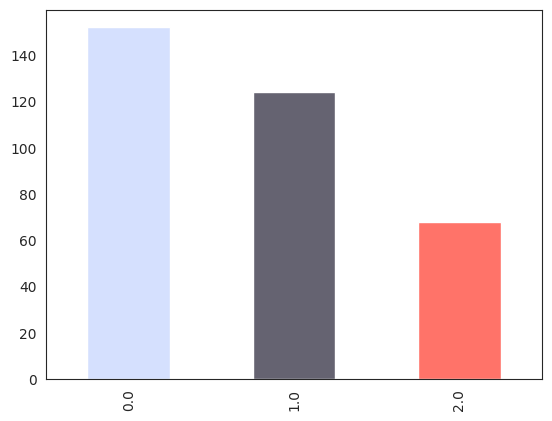

In [133]:
penguins['Species'].value_counts().plot(kind='bar',color=['#d5e0fe','#656371','#ff7369'])

As wee can see we have three groups of penguins:
- class **0** - 152
- class **1** - 124
- class **2** -  68

In [134]:
# distribution for the dependent variable (y)
pd.Series(y).value_counts(normalize=True)

0    0.441860
1    0.360465
2    0.197674
Name: Species, dtype: float64

In [135]:
# distribution for the independent variables (X)
X.describe()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass
count,344.000000,344.000000,344.000000,344.000000
mean,43.905523,17.150291,200.851744,4199.418605
std,5.447882,1.969061,14.045266,800.197923
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4025.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Unique values: 164


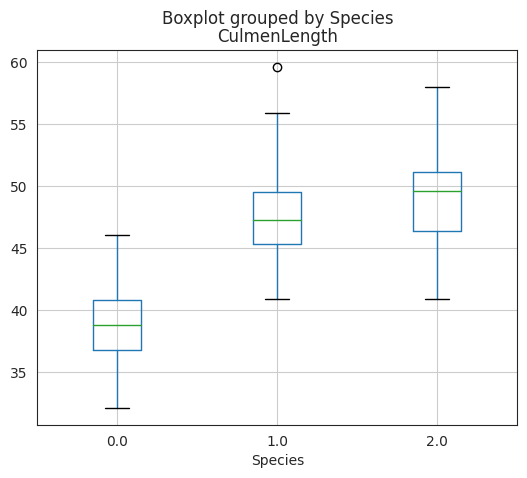

Unique values: 80


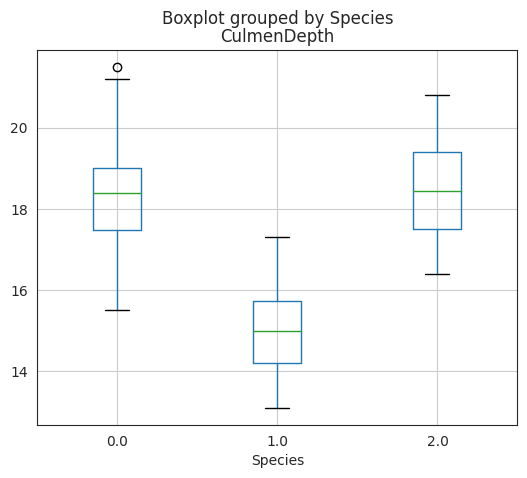

Unique values: 55


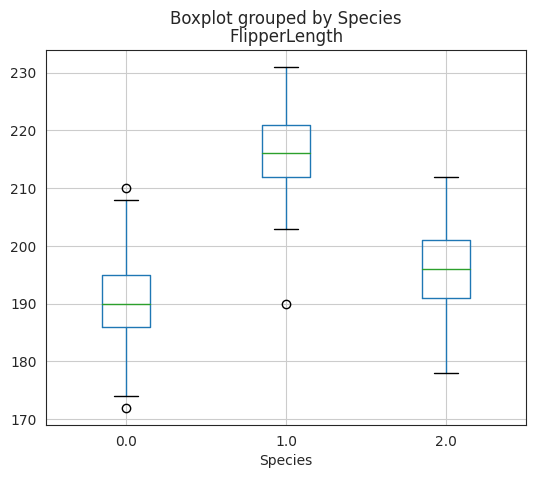

Unique values: 94


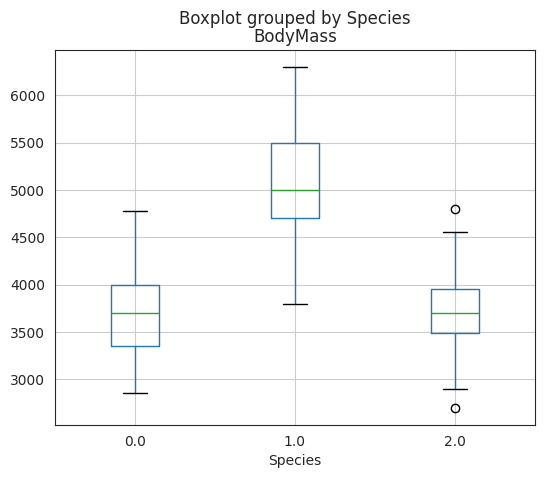

In [136]:
for col in features:
  print(f'Unique values: {len(penguins[col].unique())}')
  penguins.boxplot(column=col, by="Species", figsize=(6,5))
  plt.title(col)
  plt.show()

We can see that the greatest Column Lenght value is characteristic for class 2 while Column Depth are similar for class 1 and class 2. The smallest Column Depth we observe for class 1. Flipper Lenght is highest for class 1 as well as the Body Mass.

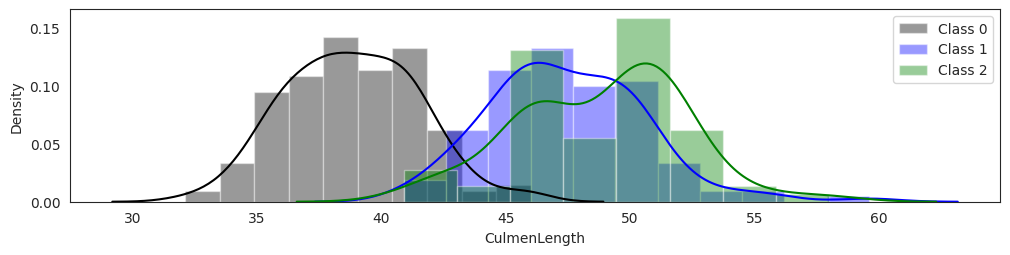

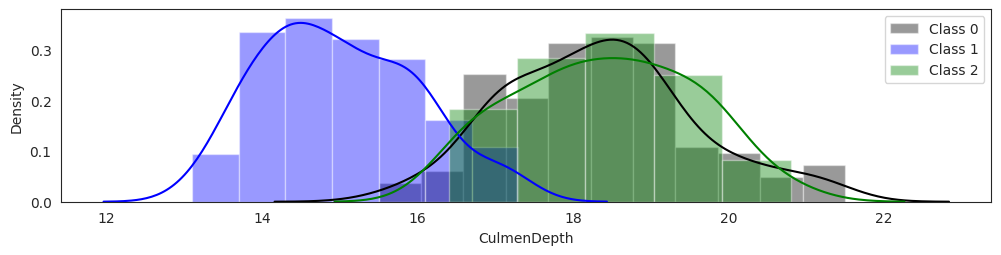

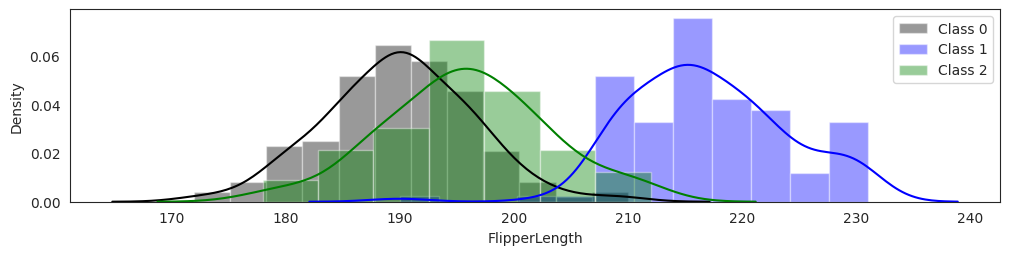

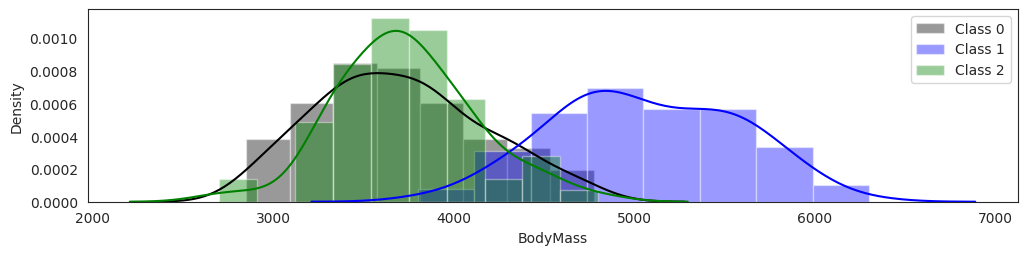

In [137]:
for col in features:
  plt.figure(figsize=(12, 2.5))
  sns.distplot(penguins.loc[penguins['Species']==0, col], kde=True, color='black', label='Class 0')
  sns.distplot(penguins.loc[penguins['Species']==1, col], kde=True, color='blue', label='Class 1')
  sns.distplot(penguins.loc[penguins['Species']==2, col], kde=True, color='green', label='Class 2')
  plt.legend(loc='upper right')
  plt.show()

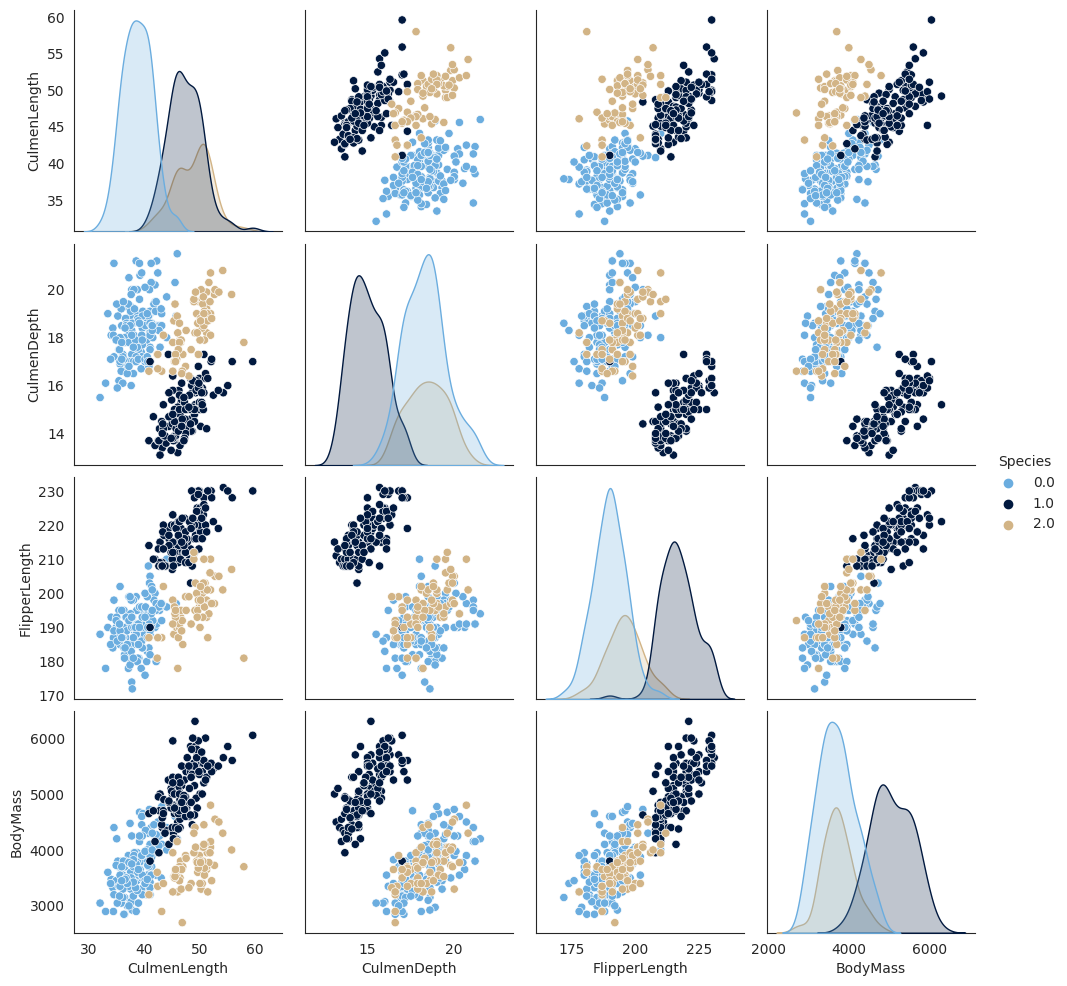

In [138]:
sns.set_style(style='white')
sns.pairplot(data=penguins,hue='Species',palette=['#6baddf','#01193f','#d2b486'])

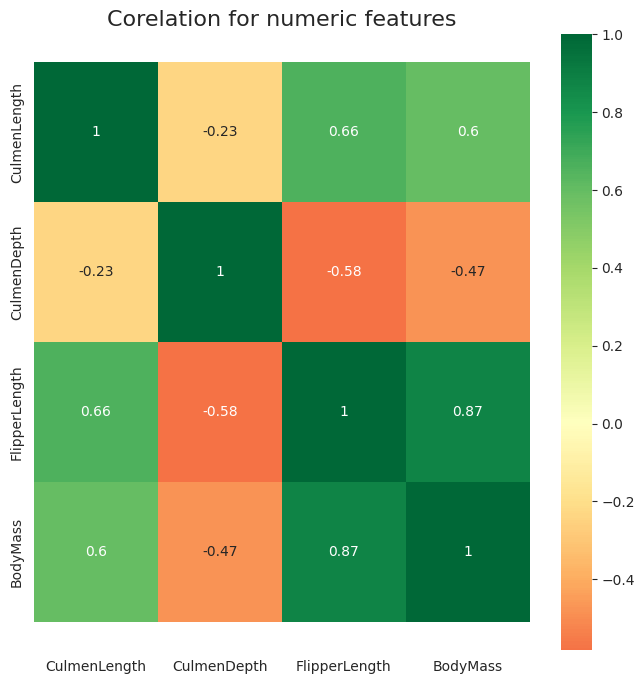

In [139]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(X.corr(),
                 xticklabels=X.corr().columns,
                 yticklabels=X.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Corelation for numeric features', fontsize=16)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.2, top - 0.2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

We can see that **Flipper Length** and **Body Mass** are strongly dependent. Correlation value is 0.87 for those variables. In other words, the longer flipper, the penguins weigh more.

In [140]:
penguins.corr()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
CulmenLength,1.000000,-0.234635,0.656856,0.595720,0.779029
CulmenDepth,-0.234635,1.000000,-0.582472,-0.471339,-0.182647
FlipperLength,0.656856,-0.582472,1.000000,0.871302,0.357800
BodyMass,0.595720,-0.471339,0.871302,1.000000,0.210214
Species,0.779029,-0.182647,0.357800,0.210214,1.000000


Belonging to a particular class is most dependent on the **CulmonLength** and **FlipperLength** variables.

In [141]:
from scipy import stats

corr_dict = {}
for col in features:
    corr_dict[col] = stats.pointbiserialr(X[col], y)[0]
pd.Series(corr_dict).sort_values(ascending=False)

CulmenLength     0.779029
FlipperLength    0.357800
BodyMass         0.210214
CulmenDepth     -0.182647
dtype: float64

## **Classifiers**

We split the data into training and test sets. We will use the stratify parameter and assign **y** there, so that both sets contain approximately the same percentage of samples from each class.

In [155]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[['FlipperLength', 'BodyMass']], y, test_size=0.30, random_state=0, stratify=y)

### **Logistic Regression**

Logistic regression is a **parametric model**, so the variables should be on the same scale. Before training the model, we will create a new **standardized X** for the training and test sets based on the mean and deviation from the training set.

In [156]:
# train the model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

LogisticRegression()

Before we proceed to evaluate our model, we can visualize based on what values the model separates the classes, so we visualize the operation of our classifier.

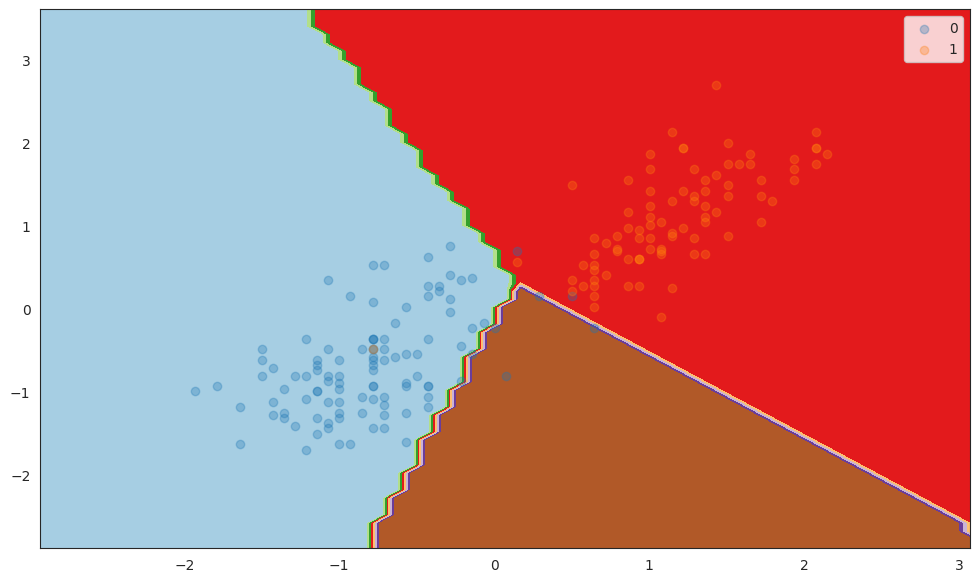

In [157]:
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import  hstack

def plot_classification_surface(X_plot, y_plot, trained_model):
  plt.figure(figsize=(12, 7))

  # define the limits of the set
  min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
  min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1

  # scale for both axes
  x1grid = arange(min1, max1, 0.1)
  x2grid = arange(min2, max2, 0.1)

  # create meshgrid
  xx, yy = meshgrid(x1grid, x2grid)

  # transforming the mesh into a vector
  r1, r2 = xx.flatten(), yy.flatten()
  r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

  # create independent variables for the model
  grid = hstack((r1, r2))

  # prediction of model set
  yhat = trained_model.predict(grid)

  # processing the prediction on a decision for a specific point on the plot
  zz = yhat.reshape(xx.shape)

  # grid visualization with assigned class
  plt.contourf(xx, yy, zz, cmap='Paired')

  # create a scatterplot for the classes in X
  for class_value in range(2):

    # assignment of class (y) to observation (X)
    row_ix = where(y_plot == class_value)

    # create scatterplot
    plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap="Paired", alpha=0.3, label=class_value)

  # plot vizualization
  plt.legend(loc='upper right')
  plt.show()

plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr)

We can see that the observations are linear separated and we can observe where is more observations of definied class.

### **Model evaluation**

We can compare our **predictions** with **true values**. So we will do this for the **first 5** and the **last 5** values.

In [158]:
# compare predictions with true values for the first and last five observations
predictions_lr = model_lr.predict(X_test_standardized)
print('Predicted labels: ', predictions_lr[:5], predictions_lr[-5:])
print("Actual labels: ", y_test[:5].values, y_test[-5:].values)

Predicted labels:  [0 0 0 0 0] [0 0 1 0 0]
Actual labels:  [0 0 0 2 2] [0 0 1 2 2]


However, such model evaluation is difficult and sometimes impossible if our set consists of many observations. Therefore, we use metrics that aggregate the results of our model. An example may be the **confusion matrix**, yes - we have already met it.

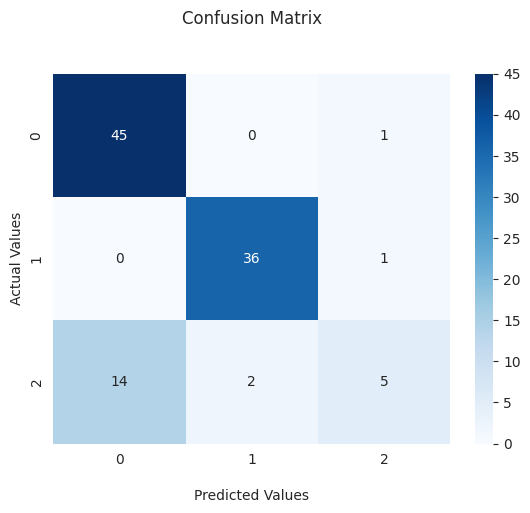

In [159]:
# confusion_matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions_lr)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')
plt.show()

Our model does not fully cope with the separation of the classes. A total 86 samples are correcty predicted out of the total 104 samples.Therefore, we will count **accuracy, precision, recall and F1 score**.

In [160]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: ', accuracy_score(y_test, predictions_lr).round(3))
print('Precision:', precision_score(y_test, predictions_lr, average='micro').round(3))
print('Recall:', recall_score(y_test, predictions_lr, average='micro').round(3))
print('F1_score:', f1_score(y_test, predictions_lr, average='micro').round(3))

Accuracy:  0.827
Precision: 0.827
Recall: 0.827
F1_score: 0.827


In [161]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_lr))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86        46
           1       0.95      0.97      0.96        37
           2       0.71      0.24      0.36        21

    accuracy                           0.83       104
   macro avg       0.81      0.73      0.72       104
weighted avg       0.82      0.83      0.79       104



Another method of evaluating classifiers are plots of the **ROC (Receiver Operating Characteristic)** curve and the **AUC (Area Under the Curve)** metric derived from this plot. Classification models can return a probability and this is what the ROC curve uses. By default, classification models have a threshold of 0.5, i.e. if the probability is higher than this threshold then the class is positive, otherwise negative.

AUC is the area under the ROC curve, and the ROC curve itself is a graph of **TPR (True Positives Rate - so-called recall)** and **FPR (False Positives Rate - so-called specificity)** depending on the **thresholds** point. The best model is the one that is closest to the upper left corner of the graph, i.e. we aim for a **TPR of 1** and an **FPR of 0**. The ROC curve through the diagonal is a reflection of the random model for balanced data.

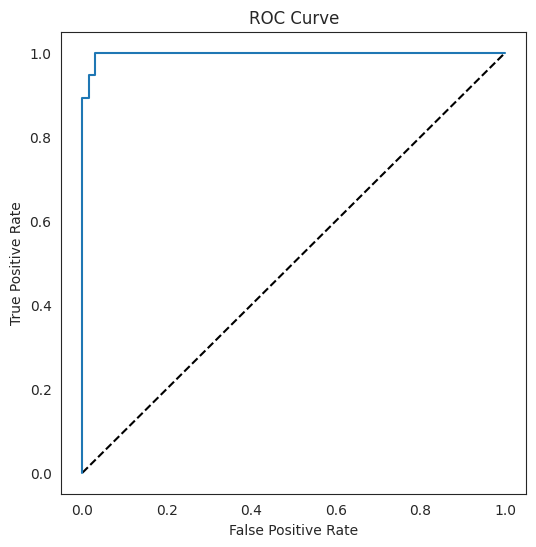

AUC: 0.9045427414992632


In [162]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# probability prediction
prediction_probability_lr = model_lr.predict_proba(X_test_standardized)

# calculation of FPR and TPR depending on the thresholds
fpr, tpr, thresholds = roc_curve(y_test, prediction_probability_lr[:,1], pos_label=1)

# ROC Curve visualization
fig = plt.figure(figsize=(6, 6))

# drawing a straight line for a random model
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# AUC calculation
auc = roc_auc_score(y_test, prediction_probability_lr, multi_class='ovo')
print('AUC: ' + str(auc))

We create a function that calculates the most important metrics and draws graphs. We will use this function when evaluating the next models, so it is worth saving the most important metrics (e.g. f1-score or AUC) of previous models for comparison purposes.

In [163]:
# function that calculates metrics and shows plots
metrics_dataframe = pd.DataFrame(columns=['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_name = []
prediction_proba_list = []

def calculate_metrics(model, name, X_checked, y_checked):
  models.append(model)
  models_name.append(name)
  global metrics_dataframe
  predictions = model.predict(X_checked)
  predictions_proba = model.predict_proba(X_checked)
  prediction_proba_list.append(predictions_proba[:, 1])

  # metrics for the model being checked
  print(classification_report(y_checked, predictions))

  # Confusion matrix
  plt.figure()
  cm = confusion_matrix(y_checked, predictions)
  ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
  ax.set_title('Confusion Matrix\n\n')
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values')
  plt.show()

  # plot ROC curve
  fig = plt.figure(figsize=(6, 6))
  plt.plot([0, 1], [0, 1], 'k--')
  for model_selected, name_selected, pred_proba in zip(models, models_name, prediction_proba_list):
    fpr, tpr, thresholds = roc_curve(y_checked, pred_proba, pos_label=1)
    plt.plot(fpr, tpr, label=name_selected)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc='lower right')
  plt.show()

  f1_metric = f1_score(y_checked, predictions, average='weighted')
  auc_metric = roc_auc_score(y_checked, predictions_proba, multi_class='ovo')
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},
                                               ignore_index=True)
  return metrics_dataframe

              precision    recall  f1-score   support

           0       0.76      0.98      0.86        46
           1       0.95      0.97      0.96        37
           2       0.71      0.24      0.36        21

    accuracy                           0.83       104
   macro avg       0.81      0.73      0.72       104
weighted avg       0.82      0.83      0.79       104



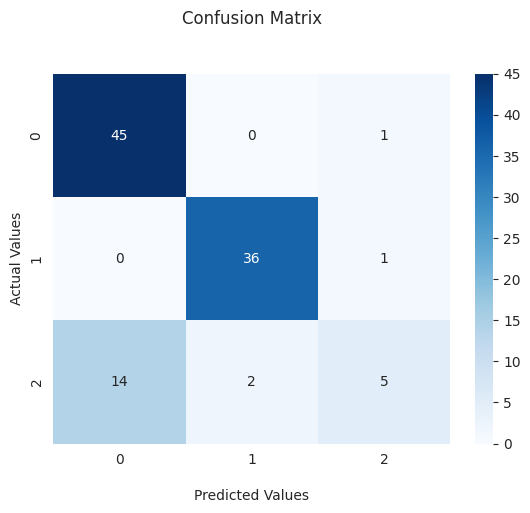

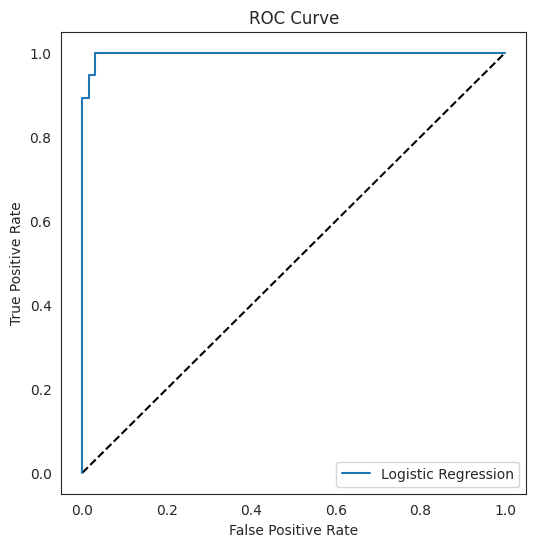

,Model,F1_score,AUC
0,Logistic Regression,0.792775,0.904543


In [164]:
calculate_metrics(model_lr, 'Logistic Regression', X_test_standardized, y_test)

### **KNN (K Nearest Neighbours)**

Another **parametric model**, so we also need **standardized**/normalized variables so that the variables have the same range of values. If we do not do this, the variable with the highest values may dominate the others, even if it is not more important for the trait. This model is used for classification, but it also reflects the regression problem.

The algorithm consists in choosing the number **k** and choosing the **distance metric**. Then, for the observation for which we make the prediction, we calculate the distances from all observations from the training set. We find the **k nearest observations** and then assign the majority class. The parameter **k** determines whether the model will be undertrained or overtrained. In summary, the KNN algorithm assigns a class from the observations most similar to the observation for which we are making a prediction.

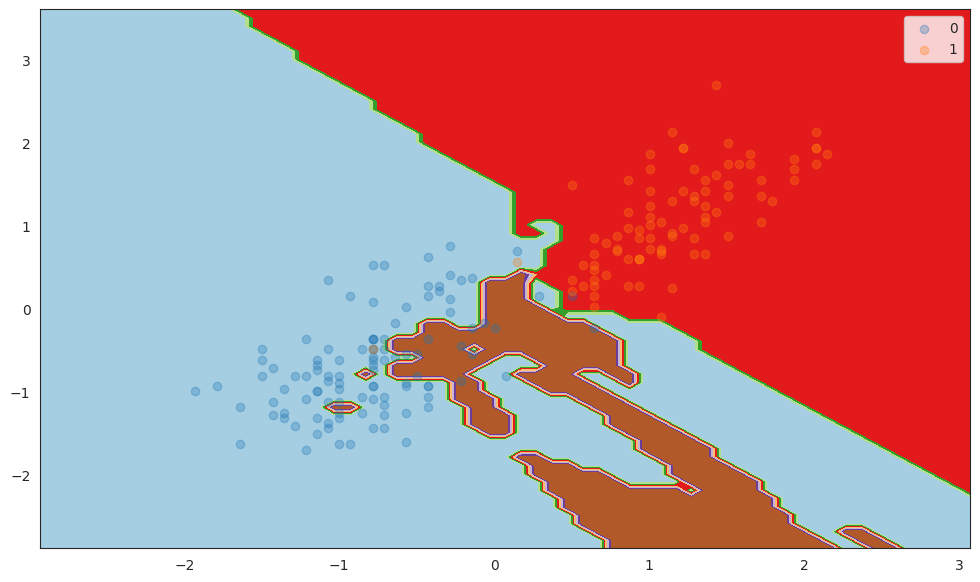

In [165]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors= 3)
model_knn.fit(X_train_standardized, y_train)
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_knn)

              precision    recall  f1-score   support

           0       0.75      0.89      0.81        46
           1       0.97      0.97      0.97        37
           2       0.50      0.29      0.36        21

    accuracy                           0.80       104
   macro avg       0.74      0.72      0.72       104
weighted avg       0.78      0.80      0.78       104



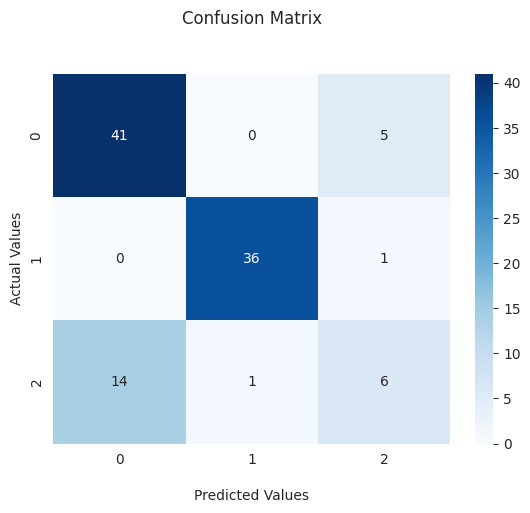

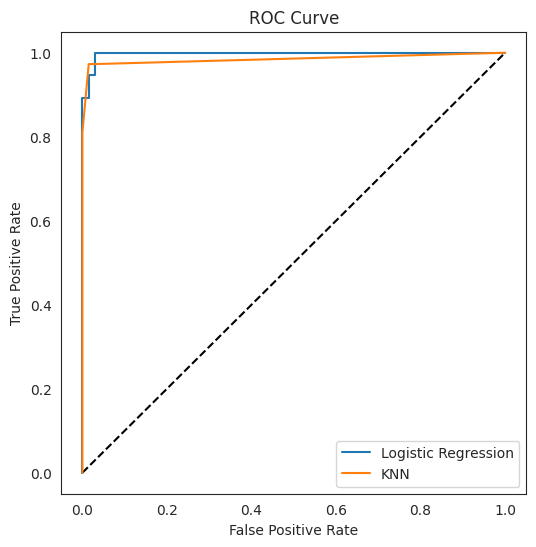

,Model,F1_score,AUC
0,Logistic Regression,0.792775,0.904543
1,KNN,0.778682,0.864587


In [166]:
calculate_metrics(model_knn, 'KNN', X_test_standardized, y_test)

For the KNeearestNeighbours the results are slightly worse.

### **Decision tree**

This model belongs to the group of **non-parametric models**, so we can train it on **non-standardized data**.

In [66]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(max_depth=3, random_state=0)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [167]:
from sklearn import tree

[Text(0.5, 0.875, 'x[0] <= 207.5\ngini = 0.635\nsamples = 240\nvalue = [106, 87, 47]'),
 Text(0.25, 0.625, 'x[0] <= 191.5\ngini = 0.433\nsamples = 150\nvalue = [104, 2, 44]'),
 Text(0.125, 0.375, 'x[1] <= 3187.5\ngini = 0.24\nsamples = 80\nvalue = [69, 1, 10]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 15\nvalue = [15, 0, 0]'),
 Text(0.1875, 0.125, 'gini = 0.286\nsamples = 65\nvalue = [54, 1, 10]'),
 Text(0.375, 0.375, 'x[1] <= 4175.0\ngini = 0.514\nsamples = 70\nvalue = [35, 1, 34]'),
 Text(0.3125, 0.125, 'gini = 0.488\nsamples = 52\nvalue = [22, 0, 30]'),
 Text(0.4375, 0.125, 'gini = 0.426\nsamples = 18\nvalue = [13, 1, 4]'),
 Text(0.75, 0.625, 'x[1] <= 4325.0\ngini = 0.106\nsamples = 90\nvalue = [2, 85, 3]'),
 Text(0.625, 0.375, 'x[1] <= 3975.0\ngini = 0.653\nsamples = 7\nvalue = [2, 3, 2]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6875, 0.125, 'gini = 0.611\nsamples = 6\nvalue = [2, 3, 1]'),
 Text(0.875, 0.375, 'x[0] <= 210.5\ngini = 0.024\nsa

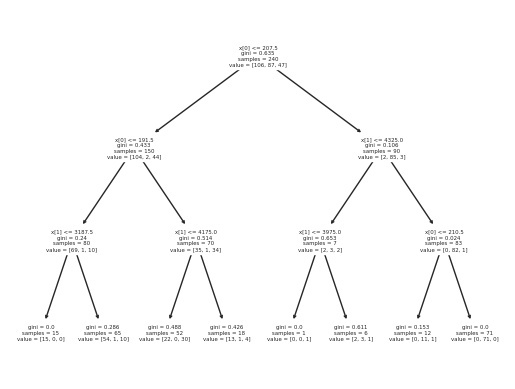

In [168]:
tree.plot_tree(model_tree)

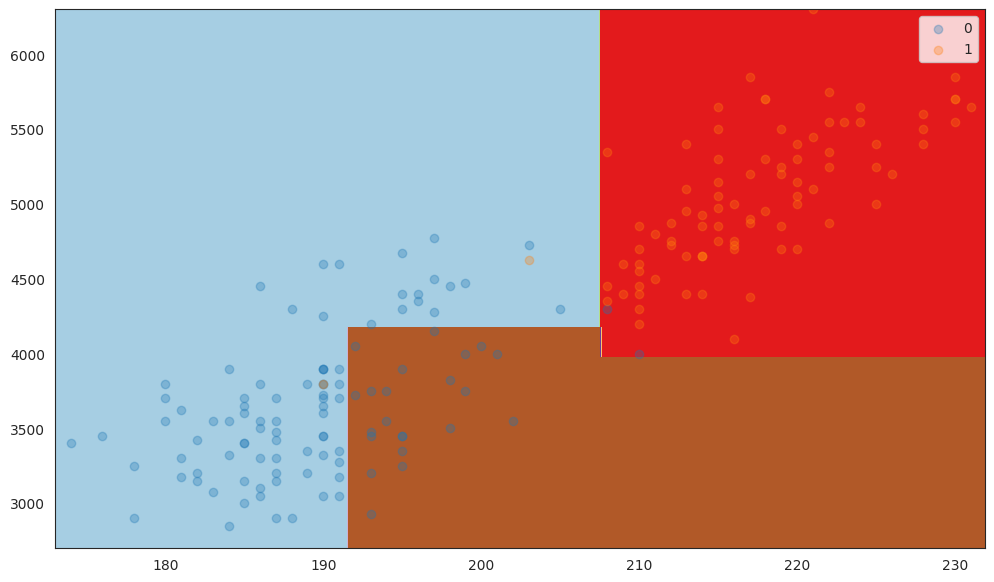

In [169]:
import numpy as np

plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, trained_model=model_tree)

              precision    recall  f1-score   support

           0       0.76      0.67      0.71        46
           1       0.97      0.95      0.96        37
           2       0.41      0.52      0.46        21

    accuracy                           0.74       104
   macro avg       0.71      0.71      0.71       104
weighted avg       0.76      0.74      0.75       104



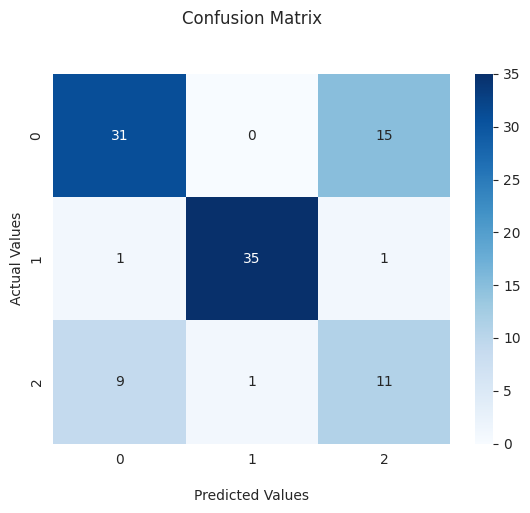

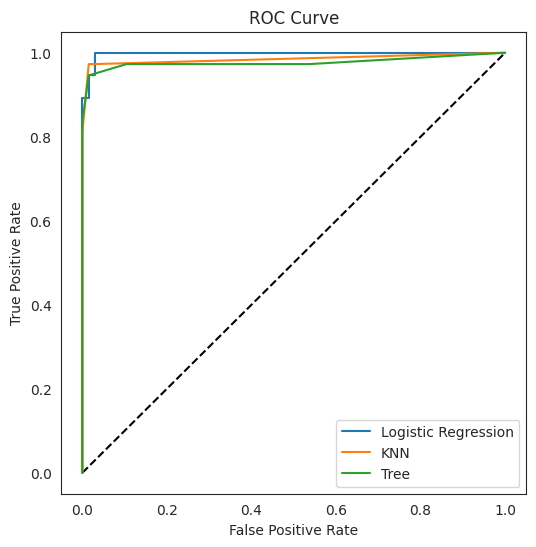

,Model,F1_score,AUC
0,Logistic Regression,0.792775,0.904543
1,KNN,0.778682,0.864587
2,Tree,0.748904,0.844891


In [170]:
calculate_metrics(model_tree, 'Tree', X_test, y_test)

### **SVM (Support Vector Machines)**

The basic **SVM** model is a **linear model** that tries to separate the two classes with a straight line that gives the widest margin (the distance between the dashed lines). SVM, unlike a decision tree, is a **parametric model**, so the model works correctly on scaled data.

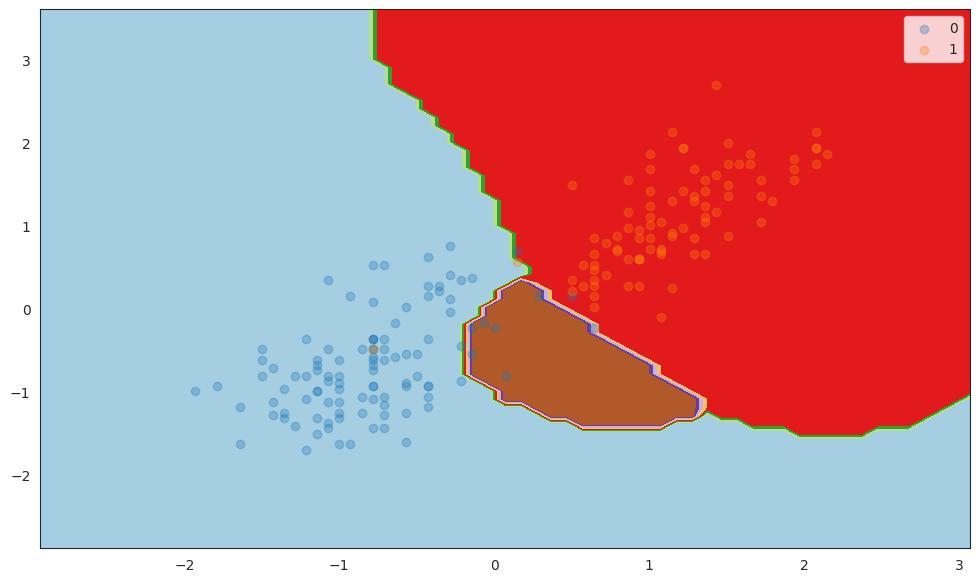

In [171]:
from sklearn.svm import SVC

model_svm = SVC(kernel='rbf', probability=True)
model_svm.fit(X_train_standardized, y_train)
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_svm)

              precision    recall  f1-score   support

           0       0.73      0.93      0.82        46
           1       0.95      0.97      0.96        37
           2       0.43      0.14      0.21        21

    accuracy                           0.79       104
   macro avg       0.70      0.68      0.66       104
weighted avg       0.75      0.79      0.75       104



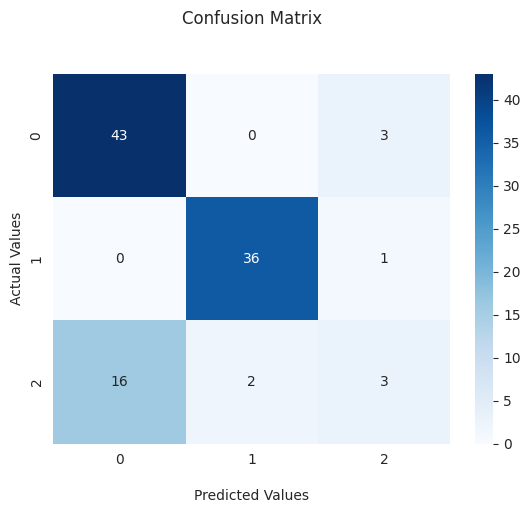

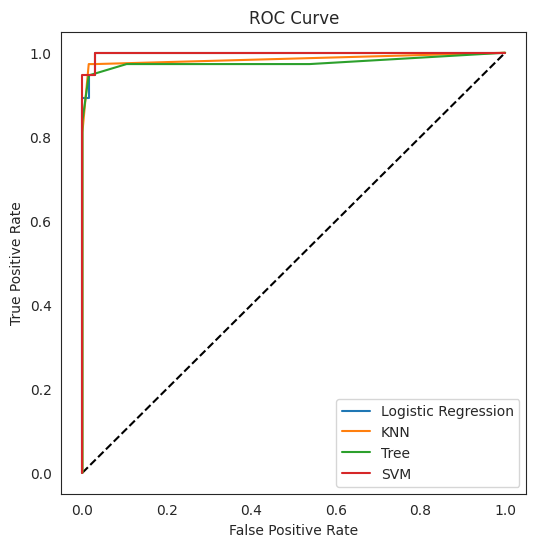

,Model,F1_score,AUC
0,Logistic Regression,0.792775,0.904543
1,KNN,0.778682,0.864587
2,Tree,0.748904,0.844891
3,SVM,0.747079,0.902412


In [172]:
calculate_metrics(model_svm, 'SVM', X_test_standardized, y_test)

### **Random Forest**

The **Random Forest Classifier** is a generalization of DecisionTreeClassifier.

If we took, say, 100 decision trees, trained each of them on a random subset of our training set, predicted the results of all of them, and then averaged them, we would get the RandomForest classifier.

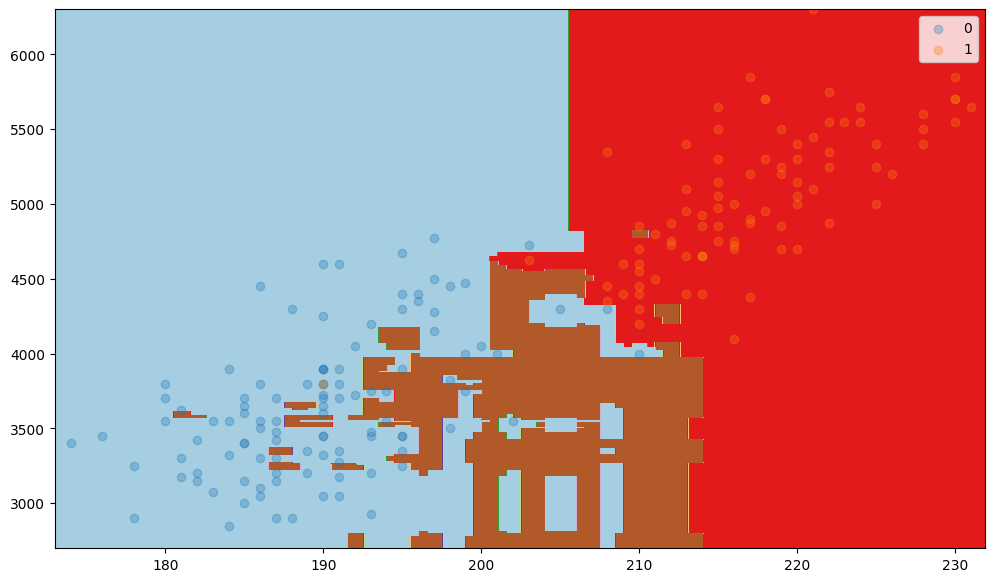

In [77]:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier()
model_forest.fit(X_train, y_train)

plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, trained_model=model_forest)

              precision    recall  f1-score   support

         0.0       0.74      0.80      0.77        46
         1.0       0.97      0.92      0.94        37
         2.0       0.47      0.43      0.45        21

    accuracy                           0.77       104
   macro avg       0.73      0.72      0.72       104
weighted avg       0.77      0.77      0.77       104



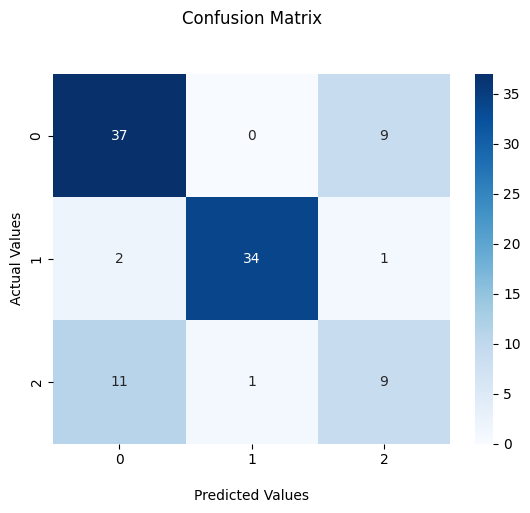

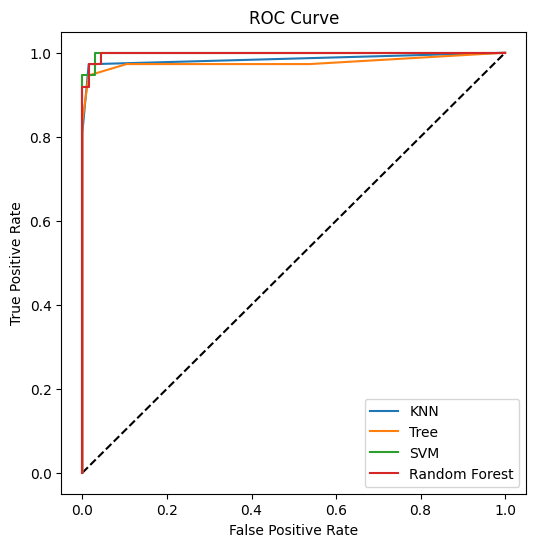

,Model,F1_score,AUC
0,KNN,0.778682,0.864587
1,Tree,0.748904,0.844891
2,SVM,0.747079,0.902249
3,Random Forest,0.767815,0.879532


In [78]:
calculate_metrics(model_forest, 'Random Forest', X_test, y_test)

### **Boosting — AdaBoost**

Boosting is a method similar to what we saw with RandomForest, which is putting several classifiers together to get a better result. There is one difference that makes **AdaBoost** usually perform better than RandomForest.

- **RandomForest** trains multiple classifiers simultaneously/in parallel, each on a subset of the input, then averages the result.

- **AdaBoost** trains many classifiers **sequentially**/after each other, passing data suitably modified/processed by the previous classifier to the next one. The next classifier focuses on data misclassified by the predecessor.

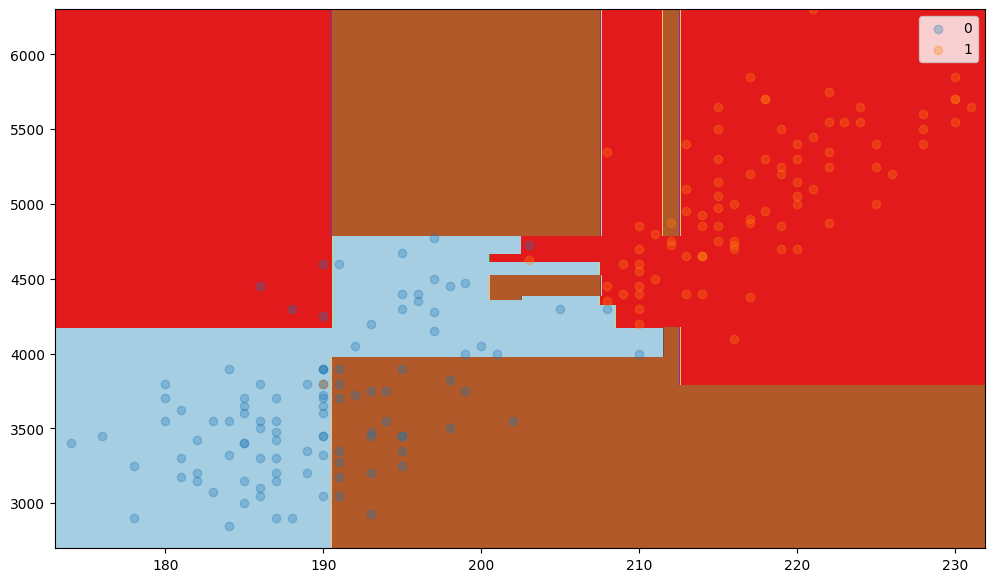

In [82]:
from sklearn.ensemble import AdaBoostClassifier

model_adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50)
model_adaboost.fit(X_train, y_train)

plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, trained_model=model_adaboost)

              precision    recall  f1-score   support

         0.0       0.72      0.67      0.70        46
         1.0       0.91      0.84      0.87        37
         2.0       0.44      0.57      0.50        21

    accuracy                           0.71       104
   macro avg       0.69      0.69      0.69       104
weighted avg       0.73      0.71      0.72       104



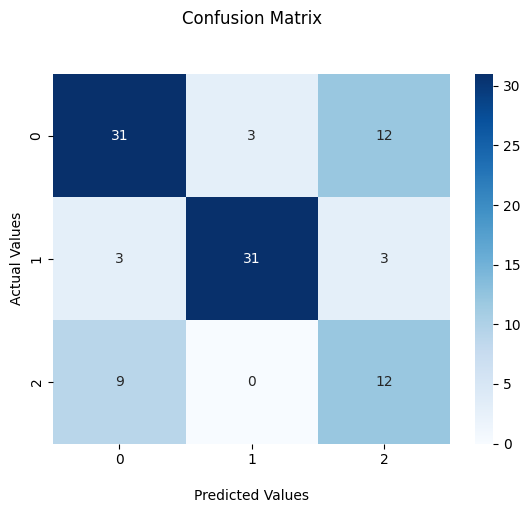

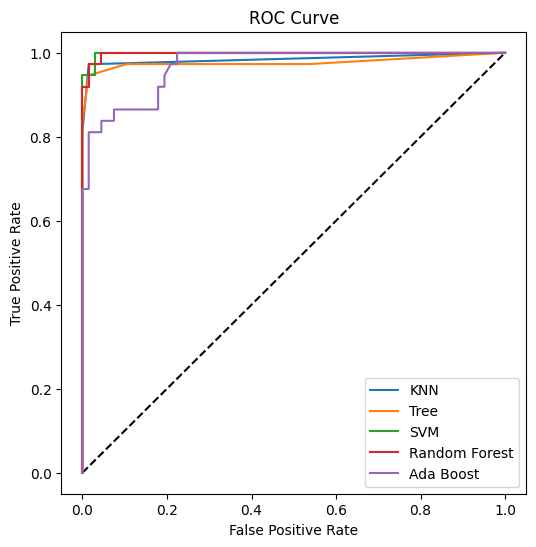

,Model,F1_score,AUC
0,KNN,0.778682,0.864587
1,Tree,0.748904,0.844891
2,SVM,0.747079,0.902249
3,Random Forest,0.767815,0.879532
4,Ada Boost,0.719758,0.861228


In [83]:
calculate_metrics(model_adaboost, 'Ada Boost', X_test, y_test)

Unfortunately, it seems that we have received a model that generalizes the worst results.

### **Ensembling - Team of classifiers**

**Ensembling** is a very popular technique consisting in assembling the results of several models - not necessarily the same. Better results are obtained by combining different models, as each of them draws attention to different things in our dataset (e.g. different features, focuses on different colors, shapes, etc.) with each other in order to obtain a better result.

There are many methodologies on how to do this. From the basic options we have:

- **Voting Ensemble** – we average the results of all the classifiers we use. All classifiers have the same weights, eg for five classifiers each will have a weight of 0.2.

- **Different weights for classifiers** - In this case, we set the weights for each of the classifiers separately, individually, so that their sum is 1.0.

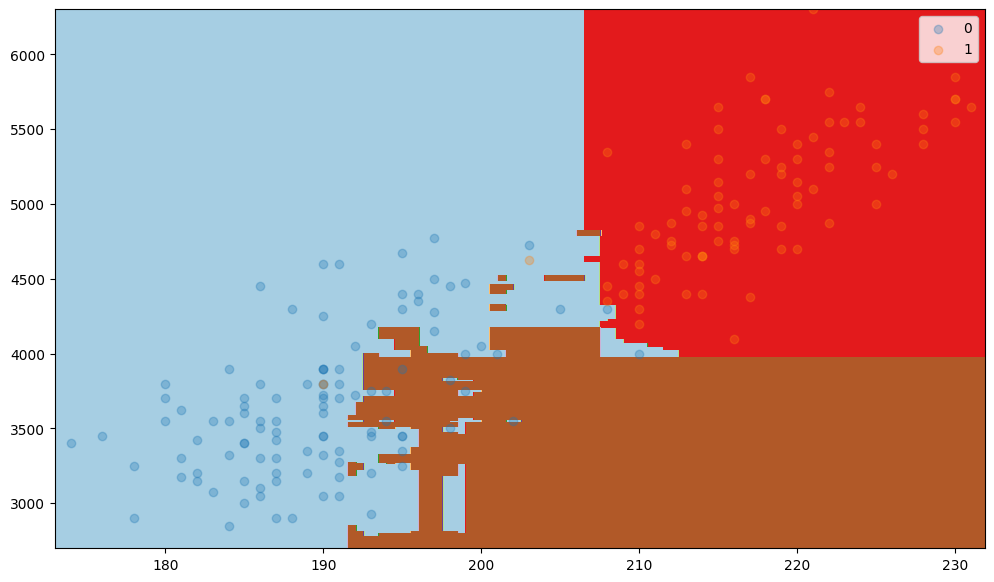

In [84]:
from sklearn.ensemble import VotingClassifier

model_voting = VotingClassifier(estimators=[('Tree', model_tree),
                                            ('Random Forest', model_forest),
                                            ('AdaBoost', model_adaboost)],
                                voting='soft')

model_voting.fit(X_train, y_train)
plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, trained_model=model_voting)

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        46
           1       0.97      0.95      0.96        37
           2       0.44      0.38      0.41        21

    accuracy                           0.77       104
   macro avg       0.72      0.71      0.71       104
weighted avg       0.76      0.77      0.76       104



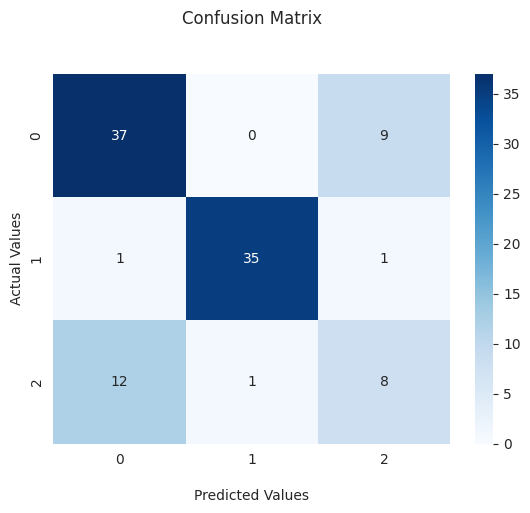

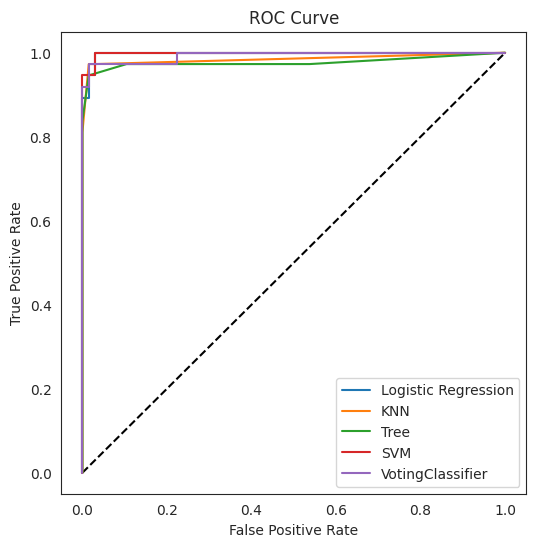

,Model,F1_score,AUC
0,Logistic Regression,0.792775,0.904543
1,KNN,0.778682,0.864587
2,Tree,0.748904,0.844891
3,SVM,0.747079,0.902412
4,VotingClassifier,0.764934,0.879069


In [173]:
calculate_metrics(model_voting, 'VotingClassifier', X_test, y_test)

### **Classification based on multiple variables**
So far, we have trained models based on only **two variables**. Now we will train the model based on **all variables** and select hyperparameters using **GridSearch**. Again, we need to split the data into a **training and a test se**t, because the previous split contains only two features. Using the same **random_state**, we will get the same split of observations.

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y)

In [86]:
from sklearn.model_selection import GridSearchCV

random_forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
params_rf = {'max_depth': [3, 5, 10, 20],
             'min_samples_leaf': [3, 5, 10, 15]}
rf_gridsearch = GridSearchCV(random_forest,
                             params_rf,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
rf_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)
rf_model_v2 = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameter: {'max_depth': 5, 'min_samples_leaf': 5}


              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        46
         1.0       1.00      1.00      1.00        37
         2.0       0.95      1.00      0.98        21

    accuracy                           0.99       104
   macro avg       0.98      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



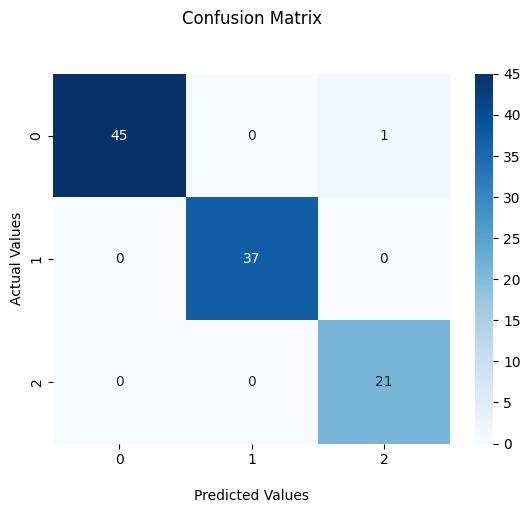

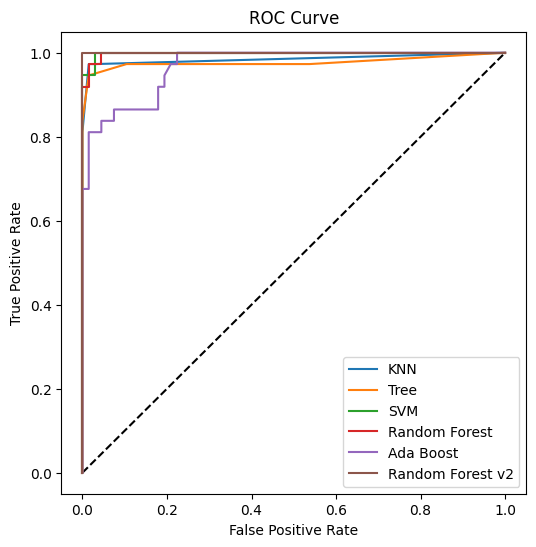

,Model,F1_score,AUC
0,KNN,0.778682,0.864587
1,Tree,0.748904,0.844891
2,SVM,0.747079,0.902249
3,Random Forest,0.767815,0.879532
4,Ada Boost,0.719758,0.861228
5,Random Forest v2,0.990444,0.998349


In [87]:
calculate_metrics(rf_model_v2, 'Random Forest v2', X_test, y_test)

The results have improved significantly!